In [1]:
import os
from glob import glob
import warnings
import numpy as np
import xarray as xr
from regridding import regrid

import gev_stat_utils as gevsu

from utils import gev_metric_ids
from utils import roar_data_path as project_data_path

In [2]:
import gev_nonstat_locscale_utils as gevnss

In [4]:
import importlib
importlib.reload(gevnss)

<module 'gev_nonstat_locscale_utils' from '/storage/work/dcl5300/current_projects/conus_comparison_lafferty-etal-2024/src/gev_nonstat_locscale_utils.py'>

In [7]:
ds = xr.open_dataset(f'{project_data_path}/extreme_value/original_grid/max_tasmax/LOCA2_CanESM5_r1i1p1f1_ssp585_1950-2100_nonstat_scale_mle_nboot100.nc')

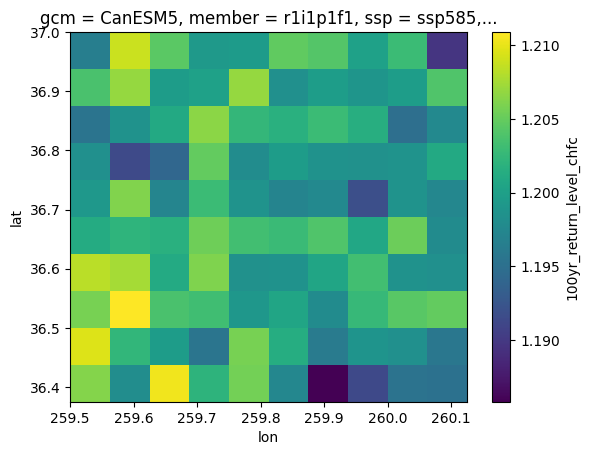

In [11]:
ds['100yr_return_level_chfc'].isel(quantile=1, time_diff=0).plot()

In [5]:
gevnss.fit_ns_gev_single(
    ensemble='LOCA2',
    gcm='CanESM5',
    member='r1i1p1f1',
    ssp='ssp585',
    metric_id='max_tasmax',
    bootstrap=True
)

In [3]:
# ############
# ### Dask ###
# ############
# from dask_jobqueue import SLURMCluster

# cluster = SLURMCluster(
#     account="pches_cr_default",
#     queue='basic',
#     cores=1,
#     processes=1,
#     memory="80GiB",
#     walltime="01:00:00",
# )

# cluster.scale(jobs=24)  # ask for jobs

# from dask.distributed import Client
# client = Client(cluster)
# client

## Fit GEV

### Obs

In [45]:
# GMET
years = [1980, 2016]
expected_length = years[1] - years[0] + 1
fit_method = 'lmom'
periods_for_level = [10, 25, 50, 100]
stationary = True

ensemble = 'GARD-LENS'
gcm = 'gmet'
ssp = 'obs'

time_name = f"{years[0]}-{years[1]}" if years is not None else "all"
stat_name = "stat" if stationary else "nonstat"

# Loop through metrics
for metric_id in gev_metric_ids:
    for ens_member in range(1,101):
        # Get names
        ens_member_str = str(ens_member).zfill(3)
        info_name = f"{ensemble}_{gcm}_{ens_member_str}_{ssp}"
        store_path = f"{project_data_path}/extreme_value/original_grid/{metric_id}/"
            
        # Read file
        ds = xr.open_dataset(f'{project_data_path}/metrics/obs/gmet/{metric_id}_gmet_{ens_member_str}.nc')
    
        # Fit
        with warnings.catch_warnings():
            warnings.filterwarnings('ignore')
            ## Main
            save_str = f"{info_name}_{time_name}_{stat_name}_{fit_method}_main.nc"
            if not os.path.exists(f"{store_path}/{save_str}"):
                ds_out = gevsu.fit_gev_xr(ds = ds.sel(time=slice("1980", "2016")),
                                          metric_id=metric_id,
                                          years=years,
                                          expected_length=expected_length,
                                          fit_method=fit_method,
                                          periods_for_level=periods_for_level)
    
                # Store to be consistent with ensemble naming
                ds_out.to_netcdf(f"{store_path}/{save_str}")

            ## Bootstrap
            save_str = f"{info_name}_{time_name}_{stat_name}_{fit_method}_nboot100.nc"
            if not os.path.exists(f"{store_path}/{save_str}"):
                ds_out = gevsu.fit_gev_xr_bootstrap(
                    ensemble=ensemble,
                    gcm=gcm,
                    member=ens_member_str,
                    ssp=ssp,
                    years=years,
                    fit_method=fit_method,
                    store_path=store_path,
                    periods_for_level=periods_for_level
                )
                ds_out.to_netcdf(f"{store_path}/{save_str}")

In [2]:
# Livneh-unsplit
years = [1950, 2014]
expected_length = years[1] - years[0] + 1
fit_method = 'lmom'
periods_for_level = [10, 25, 50, 100]
stationary = True
ensemble = 'LOCA2'
gcm = 'livneh-unsplit'
member = 'None'
ssp = 'obs'

time_name = f"{years[0]}-{years[1]}" if years is not None else "all"
stat_name = "stat" if stationary else "nonstat"
info_name = f"{ensemble}_{gcm}_{member}_{ssp}"

# Loop through metrics
for metric_id in gev_metric_ids:
    # Read file
    ds = xr.open_dataset(f'{project_data_path}/metrics/obs/livneh_unsplit/{metric_id}_livneh_unsplit.nc')
    
    # Fit
    with warnings.catch_warnings():
        warnings.filterwarnings('ignore')
        store_path = f"{project_data_path}/extreme_value/original_grid/{metric_id}/"
        
        ## Main
        ds_out = gevsu.fit_gev_xr(ds = ds.sel(time=slice("1950", "2014")),
                                  metric_id=metric_id,
                                  years=years,
                                  expected_length=expected_length,
                                  fit_method=fit_method,
                                  periods_for_level=periods_for_level)
    
        # Store to be consistent with ensemble naming
        ds_out.to_netcdf(f"{store_path}/{info_name}_{time_name}_{stat_name}_{fit_method}_main.nc")

        ## Bootstrap
        ds_out = gevsu.fit_gev_xr_bootstrap(
            ensemble=ensemble,
            gcm=gcm,
            member=member,
            ssp=ssp,
            years=years,
            fit_method=fit_method,
            store_path=store_path,
            periods_for_level=periods_for_level
        )
        ds_out.to_netcdf(f"{store_path}/{info_name}_{time_name}_{stat_name}_{fit_method}_nboot100.nc")

In [4]:
# NClimGrid
years = [1951, 2014]
expected_length = years[1] - years[0] + 1
fit_method = 'lmom'
periods_for_level = [10, 25, 50, 100]
stationary = True
ensemble = 'STAR-ESDM'
gcm = 'nclimgrid'
member = 'None'
ssp = 'obs'

time_name = f"{years[0]}-{years[1]}" if years is not None else "all"
stat_name = "stat" if stationary else "nonstat"
info_name = f"{ensemble}_{gcm}_{member}_{ssp}"

# Loop through metrics
for metric_id in gev_metric_ids:
    # Read file
    ds = xr.open_dataset(f'{project_data_path}/metrics/obs/NClimGrid/{metric_id}_nclimgrid.nc')
    
    # Fit
    with warnings.catch_warnings():
        warnings.filterwarnings('ignore')
        store_path = f"{project_data_path}/extreme_value/original_grid/{metric_id}/"
        ## Main
        ds_out = gevsu.fit_gev_xr(ds = ds.sel(time=slice("1950", "2014")),
                                  metric_id=metric_id,
                                  years=years,
                                  expected_length=expected_length,
                                  fit_method=fit_method,
                                  periods_for_level=periods_for_level)
    
        # Store to be consistent with ensemble naming
        ds_out.to_netcdf(f"{store_path}/{info_name}_{time_name}_{stat_name}_{fit_method}_main.nc")

        ## Bootstrap
        ds_out = gevsu.fit_gev_xr_bootstrap(
            ensemble=ensemble,
            gcm=gcm,
            member=member,
            ssp=ssp,
            years=years,
            fit_method=fit_method,
            store_path=store_path,
            periods_for_level=periods_for_level
        )
        ds_out.to_netcdf(f"{store_path}/{info_name}_{time_name}_{stat_name}_{fit_method}_nboot100.nc")

### Ensembles

In [4]:
# Stationary, L-moments, main
for metric_id in gev_metric_ids:
    gevsu.gev_fit_all(
        metric_id=metric_id,
        stationary=True,
        fit_method="lmom",
        periods_for_level=[10, 25, 50, 100],
        levels_for_period=None,
        proj_years=[2050, 2100],
        hist_years=[1950, 2014],
        bootstrap=False,
    )

CPU times: user 13.8 s, sys: 829 ms, total: 14.7 s
Wall time: 31.7 s


In [3]:
## Stationary, L-moments, bootstrap

# Can separate STAR-ESDM since it's higher resolution
# and requires significantly more memory

# 40GB is enough for LOCA & GARD-LENS
# 80GB needed for STAR
for metric_id in gev_metric_ids:
    gevsu.gev_fit_all(
        metric_id=metric_id,
        stationary=True,
        fit_method="lmom",
        periods_for_level=[10, 25, 50, 100],
        levels_for_period=None,
        proj_years=[2050, 2100],
        hist_years=[1950, 2014],
        bootstrap=True,
        n_boot_proj=100,
        n_boot_hist=1,
        include_STAR_ESDM=True,
    )

### TGW

In [2]:
# Reads TGW and ensures years are correct
def read_tgw(paths):
    ds = []
    for path in paths:
        years = path[:-3].split('_')[-2:]
        ds_tmp = xr.open_dataset(path)
        ds_tmp = ds_tmp.sel(time=slice(str(years[0]), str(years[1])))
        ds.append(ds_tmp)

    return xr.concat(ds, dim='time').load()

In [3]:
# Get scenarios
tgw_scenarios = np.unique([name.split('_')[2] for name in os.listdir(f"{project_data_path}/metrics/TGW/")])

In [43]:
# TGW
fit_method = 'lmom'
periods_for_level = [10, 25, 50, 100]
stationary = True
ensemble = 'TGW'
gcm = 'WRF'
member = 'None'

stat_name = "stat" if stationary else "nonstat"

# Loop through metrics
for metric_id in gev_metric_ids:
    for ssp in tgw_scenarios:
        # Read file
        paths = glob(f'{project_data_path}/metrics/TGW/{metric_id}_{ssp}_*.nc')
        ds = read_tgw(paths)

        # Fit info
        years = [1980,2019] if ssp == "historical" else [2049,2099]
        expected_length = years[1] - years[0] + 1
        time_name = f"{years[0]}-{years[1]}" if years is not None else "all"
        info_name = f"{ensemble}_{gcm}_{member}_{ssp}"
    
        # Fit
        with warnings.catch_warnings():
            warnings.filterwarnings('ignore')
            store_path = f"{project_data_path}/extreme_value/original_grid/{metric_id}/"
            ## Main
            ds_out = gevsu.fit_gev_xr(ds = ds.sel(time=slice(str(years[0]), str(years[1]))),
                                      metric_id=metric_id,
                                      years=years,
                                      expected_length=expected_length,
                                      fit_method=fit_method,
                                      periods_for_level=periods_for_level)
    
            # Store to be consistent with ensemble naming
            ds_out.to_netcdf(f"{store_path}/{info_name}_{time_name}_{stat_name}_{fit_method}_main.nc")

            ## Bootstrap
            ds_out = gevsu.fit_gev_xr_bootstrap(
                ensemble=ensemble,
                gcm=gcm,
                member=member,
                ssp=ssp,
                years=years,
                fit_method=fit_method,
                store_path=store_path,
                periods_for_level=periods_for_level
            )
            ds_out.to_netcdf(f"{store_path}/{info_name}_{time_name}_{stat_name}_{fit_method}_nboot100.nc")

## Regridding

In [2]:
%%time
# Regrid to LOCA using NN
method = "nearest"
target = "LOCA2"

for metric_id in gev_metric_ids:
    # Save path
    store_path = f"{project_data_path}/extreme_value/loca_grid/{metric_id}"
    # Get all files
    files = glob(
        f"{project_data_path}/extreme_value/original_grid/{metric_id}/STAR-ESDM*"
    ) + glob(f"{project_data_path}/extreme_value/original_grid/{metric_id}/GARD-LENS*")

    # Loop through
    for file in files:
        # Check if done
        file_name = file.split("/")[-1]
        store_name = file_name.replace(".nc", f"_{method}.nc")
        if not os.path.exists(f"{store_path}/{store_name}"):
            # Regrid and store
            ds_tmp = xr.open_dataset(file)
            ds_out = regrid(ds_tmp, method=method, target=target)
            ds_out.to_netcdf(f"{store_path}/{store_name}")

CPU times: user 147 ms, sys: 469 ms, total: 616 ms
Wall time: 9.6 s


In [6]:
%%time
# Regrid to GARD-LENS using NN
method = "nearest"
target = "GARD-LENS"

for metric_id in gev_metric_ids:
    # Save path
    store_path = f"{project_data_path}/extreme_value/gard_grid/{metric_id}"
    # Get all files
    files = glob(
        f"{project_data_path}/extreme_value/original_grid/{metric_id}/STAR-ESDM*"
    ) + glob(f"{project_data_path}/extreme_value/original_grid/{metric_id}/LOCA2*")

    # Loop through
    for file in files:
        # Check if done
        file_name = file.split("/")[-1]
        store_name = file_name.replace(".nc", f"_{method}.nc")
        if not os.path.exists(f"{store_path}/{store_name}"):
            # Regrid and store
            ds_tmp = xr.open_dataset(file)
            ds_out = regrid(ds_tmp, method=method, target=target)
            ds_out.to_netcdf(f"{store_path}/{store_name}")

CPU times: user 1min 23s, sys: 1min 45s, total: 3min 8s
Wall time: 4min 51s
